## Análisis de sentimientos de Twitter con Python
* https://platzi.com/tutoriales/1874-python-lenguaje-natural/5654-realiza-un-analisis-de-sentimiento-en-3-pasos-con-python/
    * Ejemplo https://twitter.com/whaleandjaguar_?lang=en
* https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
* https://www.justintodata.com/twitter-sentiment-analysis-python/
* https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python

### 1) Descargar tweets

In [183]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [184]:
import pandas as pd
pd.set_option('display.max_colwidth',500)

In [215]:
df=pd.read_json('https://raw.githubusercontent.com/restrepo/twitter/main/tweets_df.json')

### 2) Análisis de sentimientos

In [186]:
from textblob import TextBlob

In [187]:
TextBlob('the day is bright').polarity

0.7000000000000001

In [188]:
TextBlob('the day is gray').polarity

0.0

In [189]:
TextBlob('the day is dark').polarity

-0.15

In [190]:
TextBlob('el día es oscuro').polarity

0.0

In [ ]:
TextBlob('el día es oscuro').translate(from_lang='es',to='en')

In [ ]:
TextBlob('el día es oscuro').translate(from_lang='es',to='en').polarity

### 2. Limitar los tweet a 500 palabras

In [103]:
data=df.sample(100).reset_index(drop=True)

In [104]:
data['tweet']=data['text'].str.split(':').str[-1]

In [105]:
len(data['tweet'].sum())

22631

In [106]:
data.loc[[10]]

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,tweet
10,Oscar Carvajal,,,False,2021-05-12 03:26:44,"RT @intiasprilla: Desde #Cali en compañía de @wilsonariasc y @FabianDiazPlata les cuento que a la gente la quieren confundir, quieren llama…",[Cali],Twitter for Android,"Desde #Cali en compañía de @wilsonariasc y @FabianDiazPlata les cuento que a la gente la quieren confundir, quieren llama…"


In [112]:
polarity=[]
for tweet in data['tweet']:
    #print(tweet)
    #try:
    analysis=TextBlob(tweet)#.translate(from_lang='es',to='en')
    #except:
    #    analysis=TextBlob(tweet)
    polarity.append(analysis.polarity)

In [ ]:
TextBlob.

In [113]:
data['polarity']=polarity

In [114]:
data[['text','polarity']]

,text,polarity
0,"RT @ACVCRAN: #ParoNacional ""El campesinado del Valle del Río Cimitarra paran en contra del asesinato a líderes y lideresas defensoras de lo…",0.0
1,RT @elespectador: Los mensajes contradictorios del Gobierno frente al #ParoNacional. \nhttps://t.co/AfQc2fih3q https://t.co/SGd8NqzNTp,0.0
2,RT @CSPP_: #IMPORTANTE 🆘🗣️ Es importante que tengamos en cuenta que la defensa de los DDHH en Colombia en el marco del #ParoNacional 🇨🇴 pue…,0.0
3,"RT @dw_espanol: En la primera línea de las protestas en #Colombia\n\nEste ""instagramer"" y activista grabó de primera mano lo ocurrido durante…",0.0
4,RT @GiovanniCelisS: Ciudadanos de #Cali aplauden a @PoliciaColombia luego de levantamiento de bloqueos ilegales y disturbios en esa ciudad…,0.0
...,...,...
195,"RT @COMANDANTE_EJC: En #Cali, mi mensaje hacia ellos fue contarles que nuestro trabajo es por el bienestar, la estabilidad y seguridad de…",0.0
196,"RT @DanielPalam: En #Cali acompañamos al Pdte @IvanDuque en diálogo con diferentes instituciones y sectores del #ValleDelCauca, quienes se…",0.0
197,"RT @KevinMaOficial: Hace unos momentos en Siloé, Cali. Protesta pacífica, sostenida, pero sobre todo en paz. #ParoNacional11M #ParoNacion…",0.0
198,Art. 374 de la Constitución Política de Colombia! Es lo que hay q exigir #ParoNacionalColombia #ParoNacional12M #momentosdecambios #colombia #Cali #referendoya #nomascorruptos @CongresoCol @infopresidencia https://t.co/t9KIqrIcT5,0.0


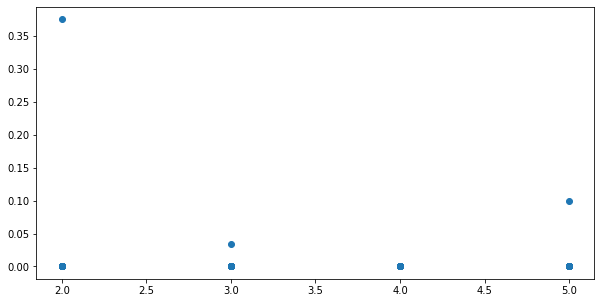

In [115]:
plt.figure(figsize=(10,5))
plt.scatter(data['date'].apply(lambda d: d.hour),data['polarity'])

### Cree un nuevo clasificador
https://textblob.readthedocs.io/en/dev/classifiers.html#classifiers

In [192]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/restrepo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

See:
* https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python

In [193]:
import re
stop_words=['rt',':']#+stopwords.words('spanish')
def preprocess_tweet_text(tweet):
    tweet=tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, re.UNICODE ,flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    #tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = tweet.replace("  "," ").split()
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [197]:
df['text'].apply(preprocess_tweet_text)

AttributeError: 'Series' object has no attribute 'lower'

In [159]:
preprocess_tweet_text( .loc[0] 

'el semanario voz recalca su apoyo a la minga indígena. nos cuida el movimiento popular, no las fuerzas militares. ✊ par…'

A favor → pos
En contra → neg

In [202]:
from fuzzywuzzy import process
from fuzzywuzzy import  fuzz

In [206]:
process.extractOne('hola',['mundo'],scorer=fuzz.ratio)[-1]

22

In [214]:
df[:1]

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,label
0,Aníbal Cano,,Optimista alegre de esta maravillosa vida que Dios Todopoderoso nos entregó . . .,False,2021-05-18 20:35:32,"RT @UnivalleU: #Movilización ✊ Gran Marcha del Millón ¡#Cali Despertó!\n\nMovilización familiar, artística y cultural de un millón de persona…","[Movilización, Cali]",Twitter for Android,None


In [ ]:
df['label']=None
ii=0
similarity=[]
for i in df.index:
    print("="*80)
    tweet=df.loc[i,'text']
    if similarity:
        if process.extractOne(tweet,similarity,scorer=fuzz.ratio)[-1]<90:
            similarity.append(tweet)
            posneg=input(f"{tweet}: https://twitter.com/twitter/status/{df.loc[i,'id']} → [pos]/neg")
            if posneg=='n':
                posneg='neg'
            elif posneg=='p':
                posneg='pos'
            else:
                continue
            df.loc[i,'label']=posneg
            ii=ii+1
    else:
        similarity.append(tweet)

    if ii==150:
        break

In [294]:
tmp

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,id,label
0,¡#55/86 en 2022!🦍🦍💪💎💎👏👏🚀🚀🌕,,#sigamonoslosbuenos #movimientoantiuribista,False,2021-05-18 20:35:29,"RT @PoloDemocratico: El #ParoNacional es la manifestación del pueblo por la inconformidad qué hay con el gobierno de @IvanDuque, queremos q…",[ParoNacional],Twitter for iPhone,1394753529844219907,pos
1,💤#Dreamer👀🧠💓 🇨🇴🇪🇸,"Barcelona, España","Hasta los🥚🥚de la #DESinformación y #MIEDO que generan la Prensa y el Gobierno😡\n\nNo creas NADA de lo que leas, escuches o veas #Investiga #Lee #Cuestiona 🧠♥️",False,2021-05-18 20:31:51,"@clarincom Estos son los del entierro del Diego?\nO más de la mentira diaria del #GobiernoDeInutiles \n\n#Covidiano🐑😷💉Evita las aglomeraciones, #VirusChino sabe cuándo sales a protestar y NO ATACA\nAún crees que #FalsaPandemia se trata de Salud Pública?😂🤣\n#Argentina #Colombia #ParoNacional https://t.co/6jAXYRVEQ4","[GobiernoDeInutiles, Covidiano]",Twitter for Android,1394752616765198338,neg
2,ingrid tatiana,colombia,Soy Una Idiota Por Pensar Que Por Una Vez En La Vida Podía Contar Contigo ...,False,2021-05-18 20:31:42,"RT @JorgeOvalleB: #DesempleoJuvenil Para el 2020 el desempleo juvenil en #CALI fue de 29,1% con 112.929 jóvenes desempleados/as, con 26 mil…","[DesempleoJuvenil, CALI]",Twitter for Android,1394752578718773256,pos
3,william martunel,,Que vaina como esta todo!,False,2021-05-18 20:31:31,"@ELTIEMPO Escucha estos sinvergüenzas, bloquean extorsionan cobrando peajes ilegales y cuando el ESMAD los rodea para impedir su avanze criminal, lloran como nenas, mirelos como dan quejas 😂😂 😂 😂 perdedores. #NoMasParo #NoMasBloqueos #NoMasBloqueos #NoMasBloqueos #NoMasBloqueos",None,Twitter for Android,1394752532430434307,neg
4,Iniciativa Interreligiosa Para Bosques Tropicales,Colombia,Somos una plataforma que une a los líderes religiosos y a las comunidades para trabajar por establecimiento de medidas que protegen los bosques tropicales.,False,2021-05-18 20:31:24,[IRI·Prensa·13/05/21] Diálogo sincero y constructivo ante crisis nacional. https://t.co/KvAqsgwfsS #ParoNacional #Colombia @CIDH @infopresidencia @MinInterior @faiths4forests @brasiliri @gaiaamazonas @InstitutoSINCHI @cutcolombia,[ParoNacional],Twitter Web App,1394752501631660036,pos
...,...,...,...,...,...,...,...,...,...,...
144,Alicia Lira Matus,,Presidenta de la Agrupación de Familiares de Ejecutados Políticos @AFEPChile Verdad Justicia y Memoria para l@s mártires víctimas Dictadura Cívico-Militar #DDHH,False,2021-05-18 18:30:52,RT @FLazosDignidad: ¿Vamos a dejar nuestro futuro en manos de aquellos que vulneran nuestros Derechos Humanos?\n\n #ParoNacional https://t.co…,[ParoNacional],Twitter for Android,1394722168588718093,pos
145,janeth eliana arango,,,False,2021-05-18 18:30:07,@VickyDavilaH #NoMasViolencia #NoMasParo #NoMasBloqueos Eso es propio de criminales y así deben ser tratados.,"[NoMasViolencia, NoMasParo, NoMasBloqueos]",Twitter for Android,1394721981111619589,neg
146,Fernando Castaño,,"Nutre tu cuerpo con ejercicio, y tu mente con la verdad..!",False,2021-05-18 18:29:46,"RT @Patrici76463579: ""Toma de #Cali plan criminal de #FARC, #ELN"" \n\nFueron usadas armas, subversivos contra autoridades, infraestructura…","[Cali, FARC, ELN]",Twitter for Android,1394721893425504261,neg
147,Jim BraXar,El viejo oeste🐴,Sarcástico e intelectual. Alérgico al comunismo. Seguidor de mis convicciones y de la libre empresa para un mundo mejor. A Dios rogando y con el mazo dando💪🤓.,False,2021-05-18 18:29:11,RT @JorgeMaichel: @RevistaSemana El comité del paró al criticar decisión del Presidente Duque por usar la fuerza legítima del Estado para a…,None,Twitter for Android,1394721746515812357,neg


In [256]:
tmp=df[~df['label'].isna()].reset_index(drop=True)

In [257]:
tmp.shape

(149, 10)

In [258]:
train=tmp[:100][['text','label']]

In [259]:
from textblob.classifiers import NaiveBayesClassifier

In [260]:
train.to_json('train.json',orient='records')

In [261]:
import nltk
nltk.download('punkt')  

[nltk_data] Downloading package punkt to /home/restrepo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [262]:
with open('train.json', 'r') as fp:
     cl = NaiveBayesClassifier(fp, format="json")

In [269]:
test=tmp[100:][['text','label']]

In [270]:
test.to_json('test.json',orient='records')

In [271]:
fulltest=test.copy()
fulltest['test']=fulltest['text'].apply(cl.classify)

In [273]:
fulltest[['text','label','test']][:3]

,text,label,test
100,RT @FabioCardozoM: Como asumirá usted @JorgeIvanOspina la orden presidencial de levantar los bloqueos en #Cali haciendo uso del mayor despl…,neg,neg
101,RT @TatyMunozO: Los bloqueos afectan al pueblo que dicen estar defendiendo. Empresas están a punto de cerrar para dejar muchos desempleados…,neg,neg
102,RT @arturo2driguez: Compartan por favor sus carteles informativos sobre los puntos de manifestación de mañana #19M en todo el país.\n#ParoNa…,pos,pos


In [286]:
cl.accuracy(test[:3].to_dict(orient='records') )

0.0

In [292]:
cl.accuracy( [ (d.get('text'),d.get('label')) for d in test.to_dict(orient='records')] )

0.7551020408163265